# Выбор локации для скважины

# Введение

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

<b>Цель работы:</b>
<div>Определение региона, где добыча нефти принесёт наибольшую прибыль. Анализ возможной прибыли и рисков техникой Bootstrap.</div>

<b>План выполнения работы:</b>
<div><b>1. Загрузка и изучение файла данных</b></div>
<div><b>2. Обучение и проверка модели для каждого региона</b></div>
<div>2.1.  Разбивка данных на выборки</div>
<div>2.2. Обучение модели на валидационной выборке</div>
<div>2.3. Определение среднего запаса предсказанного сырья и RMSE модели</div>
<div><b>3. Подготовка к расчёту прибыли</b></div>
<div>3.1. Определение ключевых значений для расчёта прибыли</div>
<div>3.2. Расчет достаточного объёма сырья для безубыточной разработки новой скважины</div>
<div><b>4. Расчёт прибыли по выбранным скважинам и предсказаниям модели с использованием функции</b></div>
<div>4.1. Выбор скважин с максимальными значениями предсказаний</div>
<div>4.3. Расчёт прибыли для полученного объёма сырья</div>
<div><b>5. Расчёт рисков и прибыли для каждого региона</b></div>
<div>5.1. Выполнить расчёт рисков и прибыли для каждого региона с применением техники Bootstrap</div>
<div><b>6. Общий вывод</b></div>

<b>Описание данных</b>

<div><b>Признаки</b></div>
<div>id — уникальный идентификатор скважины</div>
<div>f0, f1, f2 — три признака точек</div>

<div><b>Целевой признак</b></div>
<div>product — объём запасов в скважине (тыс. баррелей)</div>

<b>Условия задачи:</b>
<div><li>Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).</li></div>
<div><li>При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.</li></div>
<div><li>Бюджет на разработку скважин в регионе — 10 млрд рублей.</li></div>
<div><li>При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.</li></div>
<div><li>После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.</li></div>
<div>Данные синтетические: детали контрактов и характеристики месторождений не разглашаются.</div>

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from numpy.random import RandomState
from scipy import stats as st

Выполним загрузку данных геологоразведки для каждого из трёх рассматриваемых регионов:

### Загрузка данных для региона 0:

In [2]:
reg_0 = pd.read_csv('/datasets/geo_data_0.csv')

In [3]:
reg_0.head(10)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
5,wX4Hy,0.969570,0.489775,-0.735383,64.741541
6,tL6pL,0.645075,0.530656,1.780266,49.055285
7,BYPU6,-0.400648,0.808337,-5.624670,72.943292
8,j9Oui,0.643105,-0.551583,2.372141,113.356160
9,OLuZU,2.173381,0.563698,9.441852,127.910945


In [4]:
reg_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
reg_0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


### Загрузка данных для региона 1:

In [6]:
reg_1 = pd.read_csv('/datasets/geo_data_1.csv')

In [7]:
reg_1.head(10)

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
5,HHckp,-3.327590,-2.205276,3.003647,84.038886
6,h5Ujo,-11.142655,-10.133399,4.002382,110.992147
7,muH9x,4.234715,-0.001354,2.004588,53.906522
8,YiRkx,13.355129,-0.332068,4.998647,134.766305
9,jG6Gi,1.069227,-11.025667,4.997844,137.945408


In [8]:
reg_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [9]:
reg_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


### Загрузка данных для региона 2:

In [10]:
reg_2 = pd.read_csv('/datasets/geo_data_2.csv')

In [11]:
reg_2.head(10)

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
5,LzZXx,-0.758092,0.710691,2.585887,90.222465
6,WBHRv,-0.574891,0.317727,1.773745,45.641478
7,XO8fn,-1.906649,-2.458350,-0.177097,72.480640
8,ybmQ5,1.776292,-0.279356,3.004156,106.616832
9,OilcN,-1.214452,-0.439314,5.922514,52.954532


In [12]:
reg_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [13]:
reg_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


Рассмотрим распределение целевого признака по всем трем регионам:

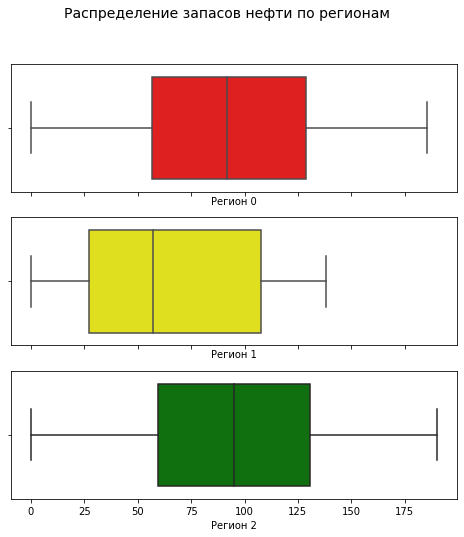

In [14]:
fig, axes = plt.subplots(3,1, sharex=True, figsize=(8,8))

sns.boxplot(reg_0['product'], ax=axes[0], color='red')
sns.boxplot(reg_1['product'], ax=axes[1], color='yellow')
sns.boxplot(reg_2['product'], ax=axes[2], color='green')

axes[0].set_xlabel('Регион 0')
axes[1].set_xlabel('Регион 1')
axes[2].set_xlabel('Регион 2')

fig.suptitle('Распределение запасов нефти по регионам', size=14)
plt.show()

**Вывод**

Загружены данные геологоразведки для каждого из трёх рассматриваемых регионов.

Всего даны 3 датасете, в каждом по 4 столбца и 100000 записей (строк).
Каждая строка содержит данные с уникальным идентификатором скважины (точки) и ее характеристиками: качество нефти и объём её запасов (тыс. баррелей).

Для построения модели машинного обучения признаки точек разведки записаны в столбцы `f0`, `f1`, `f2`. Целевой признак записан в столцец `product` (объём запасов в скважине (тыс. баррелей)).

Целевой признак для Региона 0 и Региона 2 имеет схожее распределение. Запасы нефти в Регионе 1 ниже, чем в Регионах 0 и 2, однако данные по скважинам Региона 1 имеют более равномерное распределение и меньшее количество выбросов.

Т.к. целевой признак количественный (предсказание запасов сырья в тыс. баррелей), то в проекте будет рассмотрено решение задачи регрессии.

## Обучение и проверка модели

По условиям задания для обучения модели будет использована линейная регрессия. С учетом небольшого количества признаков линейная регрессия менее подверждена переобучению по сравнению с другими алгоритмами.

### Обучение модели для Региона 0:

In [15]:
reg_0_features = reg_0.drop(['id','product'] , axis=1)
reg_0_target = reg_0['product']
reg_0_features_train, reg_0_features_valid, reg_0_target_train, reg_0_target_valid = train_test_split(
    reg_0_features, reg_0_target, test_size=0.25, random_state=12345)

model = LinearRegression()
model.fit(reg_0_features_train, reg_0_target_train)
reg_0_predicted_valid = model.predict(reg_0_features_valid)
reg_0_rmse = mean_squared_error(reg_0_target_valid, reg_0_predicted_valid) ** 0.5

print('Регион 0:')
print('Средний предсказанный запас сырья: {:.3f}'.format(reg_0_predicted_valid.mean()), 'тыс. баррелей')
print("RMSE модели: {:.3f}".format(reg_0_rmse), 'тыс. баррелей')
print('Средний фактический запас сырья: {:.3f}'.format(reg_0['product'].mean()), 'тыс. баррелей')

Регион 0:
Средний предсказанный запас сырья: 92.593 тыс. баррелей
RMSE модели: 37.579 тыс. баррелей
Средний фактический запас сырья: 92.500 тыс. баррелей


### Обучение модели для Региона 1:

In [16]:
reg_1_features = reg_1.drop(['id','product'] , axis=1)
reg_1_target = reg_1['product']
reg_1_features_train, reg_1_features_valid, reg_1_target_train, reg_1_target_valid = train_test_split(
    reg_1_features, reg_1_target, test_size=0.25, random_state=12345)

model = LinearRegression()
model.fit(reg_1_features_train, reg_1_target_train)
reg_1_predicted_valid = model.predict(reg_1_features_valid)
reg_1_rmse = mean_squared_error(reg_1_target_valid, reg_1_predicted_valid) ** 0.5

print('Регион 1:')
print('Средний предсказанный запас сырья: {:.3f}'.format(reg_1_predicted_valid.mean()), 'тыс. баррелей')
print("RMSE модели: {:.3f}".format(reg_1_rmse), 'тыс. баррелей')
print('Средний фактический запас сырья: {:.3f}'.format(reg_1['product'].mean()), 'тыс. баррелей')

Регион 1:
Средний предсказанный запас сырья: 68.729 тыс. баррелей
RMSE модели: 0.893 тыс. баррелей
Средний фактический запас сырья: 68.825 тыс. баррелей


### Обучение модели для Региона 2:

In [17]:
reg_2_features = reg_2.drop(['id','product'] , axis=1)
reg_2_target = reg_2['product']
reg_2_features_train, reg_2_features_valid, reg_2_target_train, reg_2_target_valid = train_test_split(
    reg_2_features, reg_2_target, test_size=0.25, random_state=12345)

model = LinearRegression()
model.fit(reg_2_features_train, reg_2_target_train)
reg_2_predicted_valid = model.predict(reg_2_features_valid)
reg_2_rmse = mean_squared_error(reg_2_target_valid, reg_2_predicted_valid) ** 0.5

print('Регион 2:')
print('Средний предсказанный запас сырья: {:.3f}'.format(reg_2_predicted_valid.mean()), 'тыс. баррелей')
print("RMSE модели: {:.3f}".format(reg_2_rmse), 'тыс. баррелей')
print('Средний фактический запас сырья: {:.3f}'.format(reg_2['product'].mean()), 'тыс. баррелей')

Регион 2:
Средний предсказанный запас сырья: 94.965 тыс. баррелей
RMSE модели: 40.030 тыс. баррелей
Средний фактический запас сырья: 95.000 тыс. баррелей


**Вывод**

На втором этапе выполнено обучение моделей алгоритмом линейной регрессии на данных трех регионов. В ходе обучения и проверки на валидационной выборке в каждом регионе были выявлени следующие особености:

Средний запас нефти для каждого региона предсказан достаточно точно и соответствует фактическим данным, однако метрика RMSE (метрика качества в исходных единицах измерения - корень от среднеквадратической ошибки) показала лучший результат в Регионе 1 - модель ошибавется всего на 0.893 тыс. баррелей.

Модели в Регионе 0 и Регионе 2 показали сравнительно одинаковые результаты (на первом этапе было рассмотрено распределение целефого признака, который имел схожее распределение для данных Регионов). RMSE для Региона 0 составило 37.579 тыс. баррелей, для Региона 2 - 40.030 тыс. баррелей - для данных регионов модель может ошибаться довольно значительно.

Средний предсказанный запас сырья по регионам:

<b>Регион 0:</b> 92.593 тыс. баррелей

<b>Регион 1:</b> 68.729 тыс. баррелей

<b>Регион 2:</b> 94.965 тыс. баррелей

С учетом имеющихся данных можно предположить, что разработка месторождений в Регионах 0 и 2 наиболее перспективна, поскольку месторождения в среднем содержатзначительно большие запасы нефти, чем в Регионе 1. Однако, разработка в данных меньше "пиковых" выбросов.

## Подготовка к расчёту прибыли

### Ключевые значения для расчётов прибыли:

Cохраним в отдельных переменных ключевые значения для расчётов прибыли.

Бюджет на разработку скважин в регионе, руб:

In [18]:
budget = 10000000000
print('Бюджет =', budget, 'руб')

Бюджет = 10000000000 руб


Доход с одного барреля сырья, руб:

In [19]:
barrel_cost = 450

Доход с каждой единицы продукта (единица продукта = тысяча баррелей), руб:

In [20]:
product_profit = barrel_cost * 1000
print('Доход с единицы продукта = ', product_profit, 'руб')

Доход с единицы продукта =  450000 руб


Количество месторождений, исследуемых при разработке региона:

In [21]:
total_wells = 500

Количество месторождений, выбранных для разработки:

In [22]:
best_wells = 200

При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки. Таким образом, стоимость разработки одной точки не должна превышать, руб:

In [23]:
drilling_cost = int(budget / 200)
print('Стоимость разработки 1 скважины = ', drilling_cost, 'руб')

Стоимость разработки 1 скважины =  50000000 руб


### Расчет достаточного объёма сырья для безубыточной разработки новой скважины

Формула расчета прибыли: **Прибыль** = Оборот - Себестоимость

Для нашей задачи "оборот" - это объем запасов в скважине, а себестоимость - расходы, связанные с её разработкой.

Прибыль = Объём запасов в скважине (тыс. баррелей) * Стоимость 1 тыс. баррелей - Стоимость разработки 1 скважины

Рассчитаем объем сырья, необходимый для безубыточной разработки новой скважины:

In [24]:
well_volume = drilling_cost / product_profit
print('Объем сырья для безубыточной разработки = {:.3f} тыс. баррелей'.format(well_volume))

Объем сырья для безубыточной разработки = 111.111 тыс. баррелей


Сравним полученный объём сырья со средним запасом в каждом регионе:

In [25]:
regions = [reg_0['product'].mean(), reg_1['product'].mean(), reg_2['product'].mean()]
regions

[92.50000000000001, 68.82500000000002, 95.00000000000004]

In [26]:
for i in range(len(regions)):
    print('Доля среднего запаса скважины от требуемого для безубыточной разработки в регионе', i, 
          ': {:.3f}'.format(regions[i] / 111.111 * 100), '%')

Доля среднего запаса скважины от требуемого для безубыточной разработки в регионе 0 : 83.250 %
Доля среднего запаса скважины от требуемого для безубыточной разработки в регионе 1 : 61.943 %
Доля среднего запаса скважины от требуемого для безубыточной разработки в регионе 2 : 85.500 %


**Вывод**

На третьем этапе работы определены ключевые значения, необходимые для расчета прибыли. 

Объем сырья в точке, необходимый для безубыточной разработки новой скважины должен составлять не менее 111.111 тыс. баррелей.

Требуемый объем выше, чем средний показатель прогнозируемых запасов скважин в регионах.

Однако, 75 квантиль для Регионов 0 и 2 (125.56 и 130.59 тыс. баррелей соответственно) выше, чем объем сырья, требуемый для разработки новой скважины. Для Региона 1 75 квантиль (107.81 тыс. баррелей) ниже требуемого для безубыточной разработки уровня.

## Расчёт прибыли и рисков 

### Расчёт прибыли по выбранным скважинам и предсказаниям модели

Подготовим данные целевого признака и полученных предсказаний для расчета прибыли:

In [27]:
reg_0_target_valid.reset_index(drop=True, inplace=True)
reg_1_target_valid.reset_index(drop=True, inplace=True)
reg_2_target_valid.reset_index(drop=True, inplace=True)

reg_0_predicted_valid = pd.Series(reg_0_predicted_valid)
reg_1_predicted_valid = pd.Series(reg_1_predicted_valid)
reg_2_predicted_valid = pd.Series(reg_2_predicted_valid)

Напишем функцию для расчёта прибыли по 200 выбранным скважинам с максимальными значениями предсказаний:

In [28]:
def revenue(target, probabilities, count):
    probs_sorted = probabilities.sort_values(ascending=False)
    selected = target[probs_sorted.index][:count]
    revenue = selected.sum() * product_profit 
    revenue_final = revenue - budget
    return revenue_final / 1000000000

In [29]:
print('Регион 0:')
rev_0 = revenue(reg_0_target_valid, reg_0_predicted_valid, best_wells)
roi_0 = rev_0 * 1000000000 / budget 
print('Прибыль от добычи нефти в Регионе 0: {:.3f}'.format(rev_0), 'млрд. руб')
print('ROI для Региона 0: {:.3f}'.format(roi_0), 'млрд. руб')

Регион 0:
Прибыль от добычи нефти в Регионе 0: 3.321 млрд. руб
ROI для Региона 0: 0.332 млрд. руб


In [30]:
print('Регион 1:')
rev_1 = revenue(reg_1_target_valid, reg_1_predicted_valid, best_wells)
roi_1 = rev_1 * 1000000000 / budget 
print('Прибыль от добычи нефти в Регионе 1: {:.3f}'.format(rev_1), 'млрд. руб')
print('ROI для Региона 1: {:.3f}'.format(roi_1), 'млрд. руб')

Регион 1:
Прибыль от добычи нефти в Регионе 1: 2.415 млрд. руб
ROI для Региона 1: 0.242 млрд. руб


In [31]:
print('Регион 2:')
rev_2 = revenue(reg_2_target_valid, reg_2_predicted_valid, best_wells)
roi_2 = rev_2 * 1000000000 / budget 
print('Прибыль от добычи нефти в Регионе 2: {:.3f}'.format(rev_2), 'млрд. руб')
print('ROI для Региона 2: {:.3f}'.format(roi_2), 'млрд. руб')

Регион 2:
Прибыль от добычи нефти в Регионе 2: 2.710 млрд. руб
ROI для Региона 2: 0.271 млрд. руб


**Вывод**

Наибольшая валовая прибыль, рассчитанная по 200 выбранным скважинам с максимальными значениями предсказаний, получена в Регионе 0 = 3.321 млрд. руб. ROI для данного региона равен 0.332 млрд. руб - это означает, что на каждый вложенный в разработку месторождений 1 млрд. руб принесет прибыль в размере 0.322 млрд. руб.

Данные подготовлены для применения техники Bootstrap.

### Расчет рисков и прибыли для каждого региона

В цикле применим технику Bootstrap и посчитаем прибыль и риски для каждого из регионов:
<li>применим технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли;</li>
<li>найдем среднюю прибыль, 95%-й доверительный интервал и риск убытков.</li>
Результат сохраним в переменной bootstrap_results.

In [36]:
state = np.random.RandomState(12345)
def revenue_bootstrap(target, probabilities):
    values = []
    for i in range(1000):
        target_subsample = target.sample(n=total_wells, replace=True, random_state=state)
        probs_subsample = probabilities[target_subsample.index]
        values.append(revenue(target_subsample, probs_subsample, best_wells))

    values = pd.Series(values)
    mean = values.mean()
    print('Средняя прибыль: {:.3f} млрд.руб.'.format(mean))
    
    lower = np.quantile(values, 0.025)
    upper = np.quantile(values, 0.975)
    print('95%-й доверительный интервал: {} - {} млрд.руб.'.format(lower, upper))
    risk_of_loss = (values < 0).sum() / values.count() * 100
    print('Риск убытков: {:.1f} %'.format(risk_of_loss))
    return

In [37]:
print('Регион 0:')
revenue_bootstrap(reg_0_target_valid, reg_0_predicted_valid)

Регион 0:
Средняя прибыль: 0.426 млрд.руб.
95%-й доверительный интервал: -0.10209009483793655 - 0.9479763533583688 млрд.руб.
Риск убытков: 6.0 %


In [38]:
print('Регион 1:')
revenue_bootstrap(reg_1_target_valid, reg_1_predicted_valid)

Регион 1:
Средняя прибыль: 0.518 млрд.руб.
95%-й доверительный интервал: 0.1281232314330863 - 0.9536129820669086 млрд.руб.
Риск убытков: 0.3 %


In [35]:
print('Регион 2:')
revenue_bootstrap(reg_2_target_valid, reg_2_predicted_valid)

Регион 2:
Средняя прибыль: 0.420 млрд.руб.
95%-й доверительный интервал: -0.11585260916001143 - 0.989629939844574 млрд.руб.
Риск убытков: 6.2 %


**Вывод**

Полученные данные показывают:

Риски получения убытков присутствуют во всех 3 регионах.

Самый высокий показатель средней прибыли в **Регионе 1**, в Регионах 0 и 2 показатели средней прибыли очень близки. Стоит отметить, что в Регионе 1 ниже риск и гораздо уже 95-й доверительный интервал.

С учетом полученной информации, наиболее предпочтительный регион для бурения скважин - **Регион 1**.

## Вывод

В данной проектной работе на основании имеющихся синтетических данных и с применением техники Bootstrap определен регион, где добыча нефти принесёт наибольшую прибыль.

Обучение модели алгоритмом линейная регрессия в 3 регионах показала, что в Регионе 1 лучший показатель метрики качества RMSE, модель предсказывает наличие запасов нефти с точность до 0.893 тыс.баррелей, в то время как в Регионе 0 и 2 достигается разброс в 37.579 тыс. баррелей и 40.030 тыс. баррелей соответственно.

Риски получения убытков присутствуют во всех 3 регионах.

Самый высокий показатель средней прибыли в **Регионе 1**, в Регионах 0 и 2 показатели средней прибыли очень близки. Стоит отметить, что в Регионе 2 ниже риск и гораздо уже 95-й доверительный интервал.

С учетом полученных результатов, как наиболее перспективный регион следует отметить **Регион 1**. Добыча нефти в этом регионе связана с наименьшим риском и может принести наибольшую прибыль.